In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 데이터 준비

In [199]:
df = pd.read_csv("./data/auto-mpg.csv", header = None)
df.columns = ["mpg",
             "cylinders",
             "displacement",
             "horsepower",
             "weight",
             "acceleration",
             "model_year",
             "origin",
             "name"]
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [200]:
df["cylinders"].unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [201]:
df["origin"].value_counts()

origin
1    249
3     79
2     70
Name: count, dtype: int64

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [203]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [204]:
# 누락 데이터("?") 삭제
df["horsepower"].replace("?", np.nan, inplace = True) # "?"를 np.nan으로 변경
df.dropna(subset = ["horsepower"], axis = 0, inplace = True) # 누락데이터 행을 삭제
df["horsepower"] = df["horsepower"].astype("float64") # 문자열을 실수형으로 변환

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


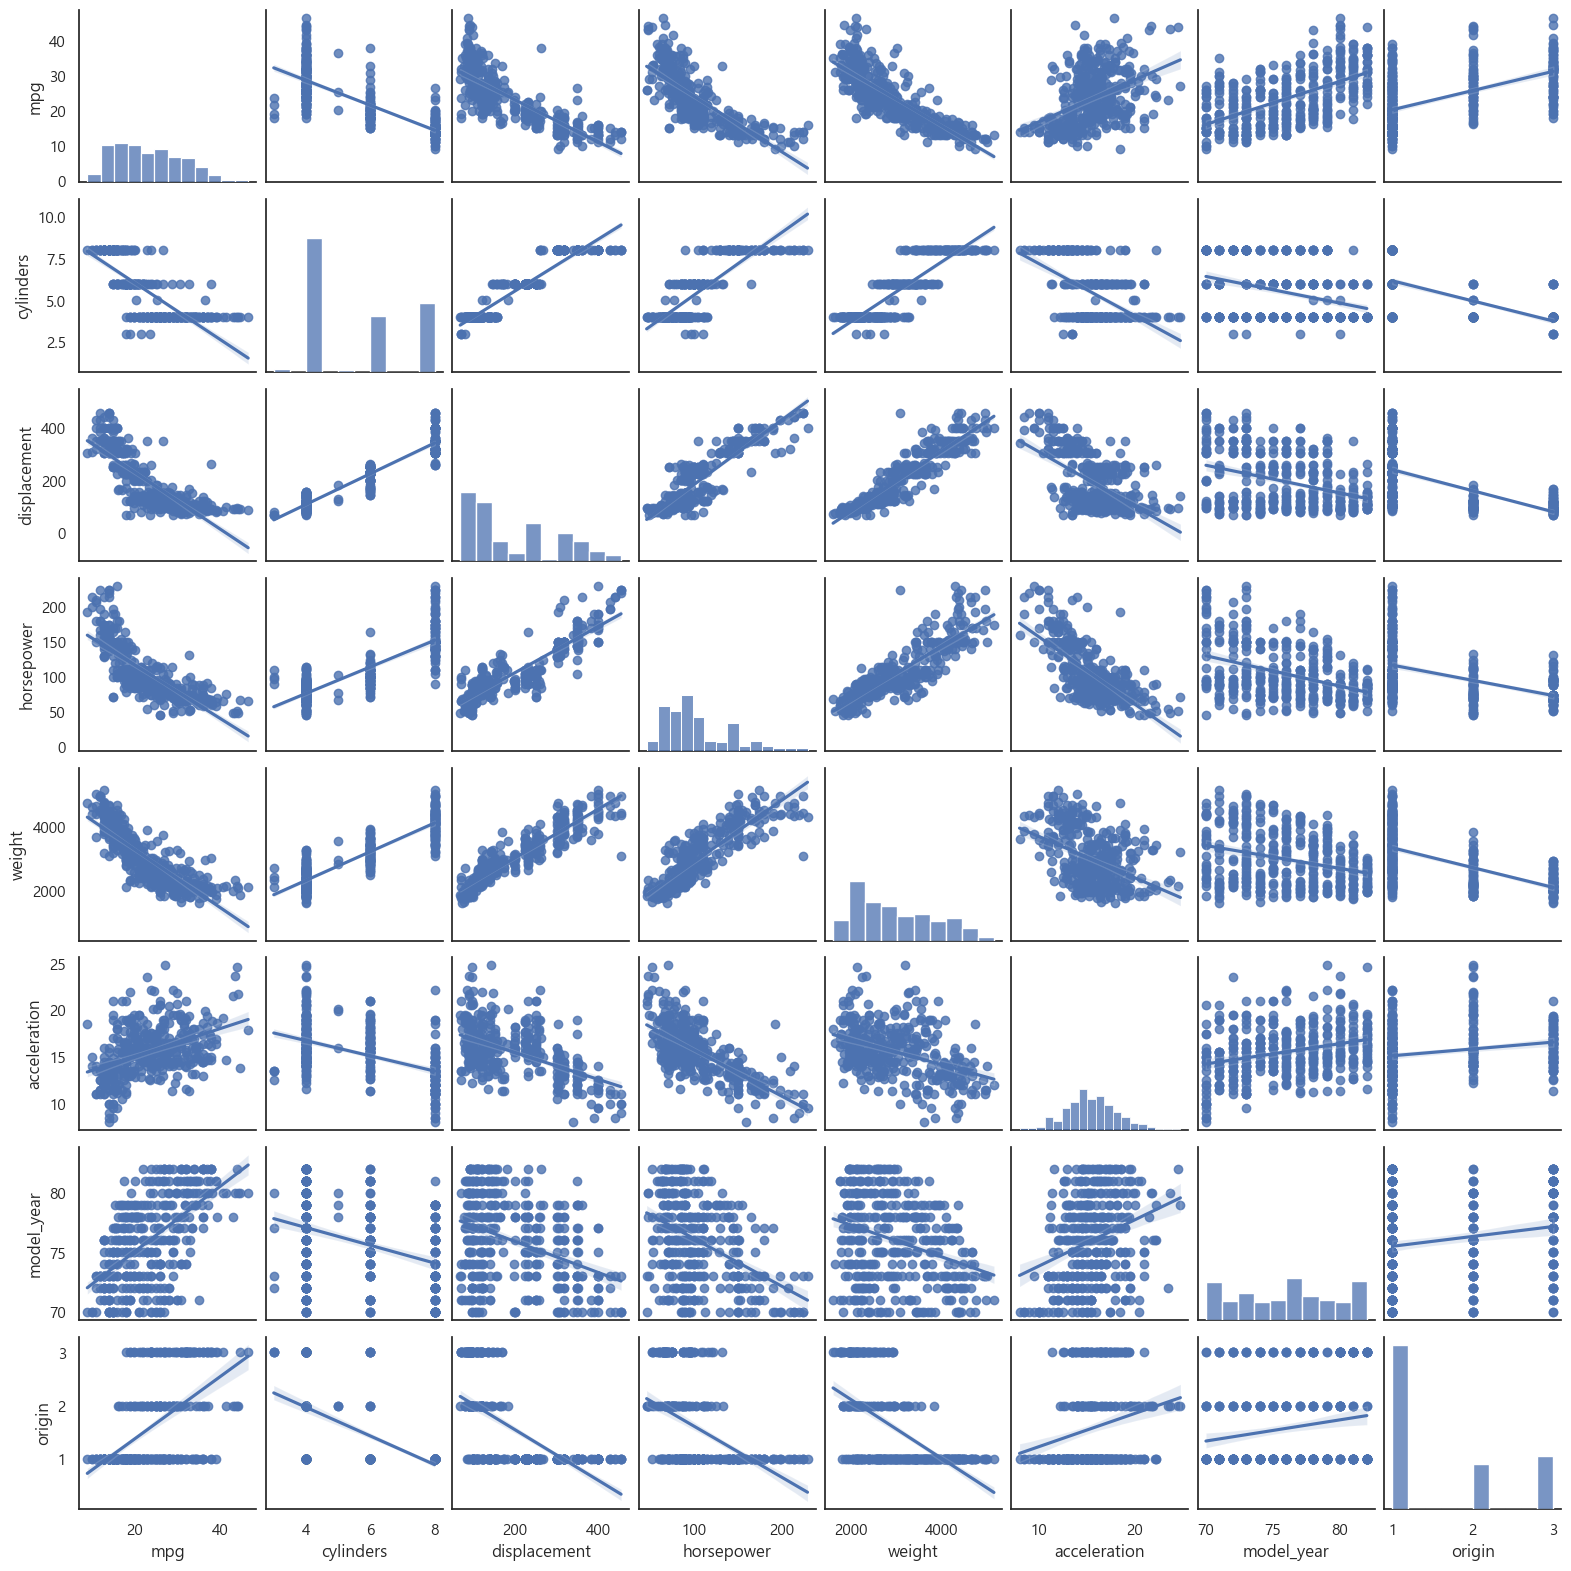

In [205]:
sns.pairplot(df.drop("name", axis = 1), kind='reg', height=2)

In [206]:
df2 = df.drop("name", axis = 1)

<function matplotlib.pyplot.show(close=None, block=None)>

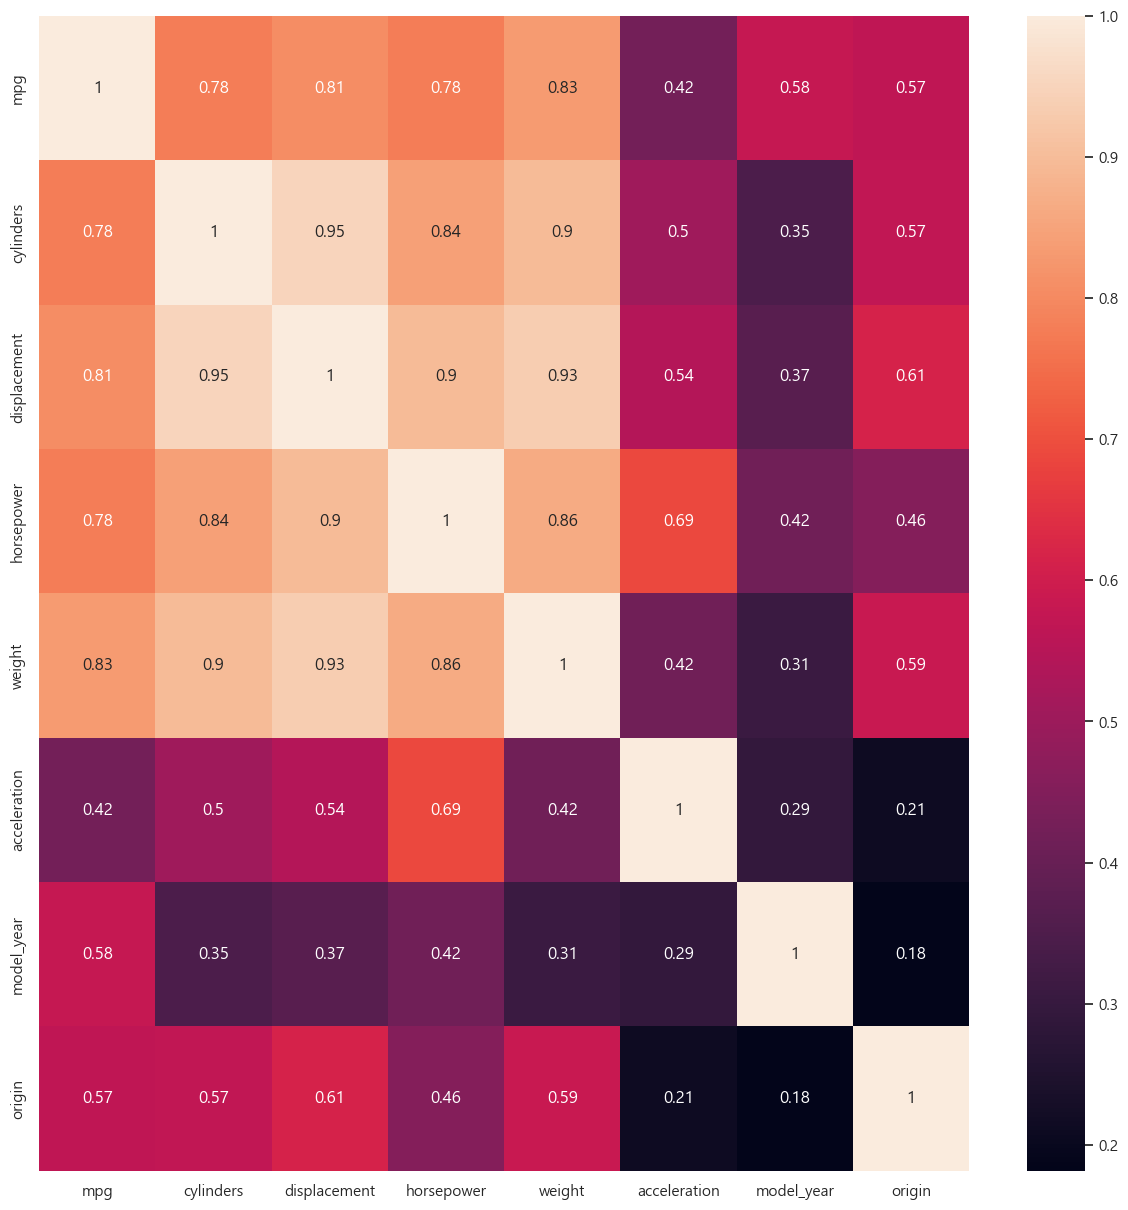

In [207]:
plt.figure(figsize = (15, 15))
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')
corr_matrix = df2.corr()
sns.heatmap(np.abs(corr_matrix), annot=True)
plt.show

In [208]:
x_train, x_test, y_train, y_test = train_test_split(df["weight"], df["mpg"], test_size = 0.25, random_state = 8) 

In [209]:
lr = LinearRegression()
ss = StandardScaler()

In [210]:
x_train = np.reshape(x_train.values, (-1, 1))
x_test = np.reshape(x_test.values, (-1, 1))

In [211]:
lr.fit(x_train, y_train)

LinearRegression()

In [212]:
lr.score(x_test, y_test)

0.6448386860258938

In [213]:
pred = lr.predict(x_test)
mse = mean_squared_error(y_test, pred)
mse

22.463732704714854

In [401]:
y = df["mpg"]
df3 = df[["horsepower", "weight"]]

In [402]:
#df3["squared_dis"] = df["displacement"] ** 2
df3["squared_hor"] = df["horsepower"] // 2
df3["squared_wei"] = df["weight"] // 2

C:\Users\ITSC\AppData\Local\Temp\ipykernel_2812\2924855787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["squared_hor"] = df["horsepower"] // 2
C:\Users\ITSC\AppData\Local\Temp\ipykernel_2812\2924855787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["squared_wei"] = df["weight"] // 2


In [403]:
x_train, x_test, y_train, y_test = train_test_split(df3, df["mpg"], test_size = 0.25, random_state = 0)

In [404]:
mm = MinMaxScaler()
scaled_train = mm.fit_transform(x_train)

In [409]:
#x_train = np.reshape(x_train.values, (-1, 1))
#x_test = np.reshape(x_test.values, (-1, 1))
lr.fit(x_train, y_train)

LinearRegression()

In [410]:
lr.score(x_train, y_train), lr.score(x_test, y_test)

(0.7148750952485448, 0.6761448708982147)

In [411]:
pred = lr.predict(x_test)
mse = mean_squared_error(y_test, pred)
mse

19.26631023455982

In [412]:
x_train

,horsepower,weight,squared_hor,squared_wei
144,52.0,1649.0,26.0,824.0
247,70.0,2070.0,35.0,1035.0
90,198.0,4952.0,99.0,2476.0
172,71.0,2223.0,35.0,1111.0
21,90.0,2430.0,45.0,1215.0
...,...,...,...,...
325,48.0,2085.0,24.0,1042.0
194,90.0,3085.0,45.0,1542.0
118,75.0,2158.0,37.0,1079.0
48,88.0,3139.0,44.0,1569.0
